In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
import ete3
import dendropy
from skbio import DistanceMatrix

In [2]:
cur_seq_dict = SeqIO.to_dict(SeqIO.parse("curated_sequences.fasta", "fasta"))
seq_records = list(cur_seq_dict.values())

# showing how a single record looks like
print(seq_records[0])
print('')
print(seq_records[0].seq[:100],'...')

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 |Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome|China
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC ...


In [5]:
len(seq_records)

20

## create classical phylogenetic tree using biopython
following this [page](https://biopython.org/wiki/Phylo)

In [3]:
from Bio.Align.Applications import MuscleCommandline

In [6]:
#cmdline = MuscleCommandline(input="curated_sequences.fasta", out="curated_sequences_aligned.aln", clw=True)
#cmdline()

# did in terminal with $ muscle -in curated_sequences.fasta -out curated_sequences_aligned.aln -clw

In [7]:
from Bio import AlignIO

AlignIO.convert("curated_sequences_aligned.aln", "clustal", "curated_sequences_aligned.phy", "phylip-relaxed")


1

In [9]:
from Bio.Phylo.Applications import PhymlCommandline

cmdline = PhymlCommandline(input='curated_sequences_aligned.phy', datatype='aa', model='WAG', alpha='e', bootstrap=100)
out_log, err_log = cmdline()



In [3]:
from Bio import Phylo

cov_tree = Phylo.read("curated_sequences_aligned.phy_phyml_tree.txt", "newick")
Phylo.draw_ascii(cov_tree)



           , MT276598.1
          ,|
          ||____________________________________________________ MT568645.1
          |
          | MT318827.1
          |
       ___|_ MT682732.1
      |   |
      |   | MT655131.1
      |
   ___|   __ MT510690.1
  |   | _|
  |   || |________ MT627396.1
  |   ,|
  |   || ___ MT582453.1
  |   |||
  |   | | MT703677.1
  |   |
  |   |____ MT513758.1
  |
  |___ MT627325.1
  |
  | NC_045512.2
  |
 ,| , MN985325.1
 ||_|
 || |______ MT198652.2
 ||
 ||   , MT276597.1
_||___|
 |    |_ MT641645.1
 |
 |_ MT007544.1
 |
 |_ MT066156.1
 |
 |   , MT126808.1
 |___|
     |_ MT350282.1



In [4]:
cov_tree

Tree(rooted=False, weight=1.0)

In [92]:

t = ete3.Tree('(((((((((MT276598.1:0.00000000,MT568645.1:0.00174544)65:0.00003766,MT318827.1:0.00003765)21:0.00000001,MT682732.1:0.00007534)50:0.00000001,MT655131.1:0.00003768)97:0.00011295,(((MT510690.1:0.00009564,MT627396.1:0.00029543)86:0.00006148,(MT582453.1:0.00011336,MT703677.1:0.00000001)94:0.00003771)67:0.00003768,MT513758.1:0.00015066)39:0.00000001)95:0.00015065,(MT627325.1:0.00015078,NC_045512.2:0.00000001)20:0.00000001)3:0.00000001,(MN985325.1:0.00003764,MT198652.2:0.00022694)89:0.00007531)29:0.00000001,(MT276597.1:0.00000001,MT641645.1:0.00007551)93:0.00015083)51:0.00003762,MT007544.1:0.00007528,(MT066156.1:0.00004477,(MT126808.1:0.00000000,MT350282.1:0.00007522)91:0.00011037)30:0.00003300);')

In [11]:
ts = ete3.TreeStyle()
ts.show_branch_length = True
t.render('%%inline', tree_style=ts)

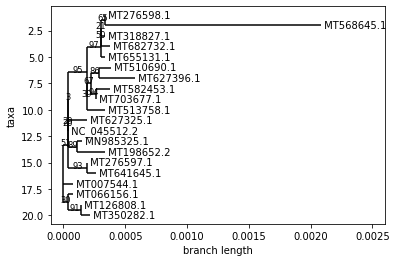

In [16]:
Phylo.draw(cov_tree)

In [10]:
labels = ['NC_045512_China_2019-12', 'MN985325_USA_2020-01-19', 'MT007544_Australia__Melbourne__Victoria_2020-01-25', 'MT126808_Brazil_2020-02-28', 'MT066156_Italy_2020-01-30', 'MT198652_Spain__Valencia_2020-03-05', 'MT276597_Israel_2020-02', 'MT276598_Israel_2020-03', 'MT350282_Brazil_2020-03-18', 'MT318827_Germany_2020-03-19', 'MT513758_Morocco_2020-04-23', 'MT568645_Morocco__Casablanca_2020-05-15', 'MT582453_Germany__Dusseldorf_2020-03-20', 'MT510690_Egypt_2020-05-02', 'MT627325_China_2020-02-28', 'MT641645_Australia__Northern_Territory_2020-02-21', 'MT655131_Spain__Donostia-San_Sebatian_2020-03-25', 'MT627396_Egypt_2020-06-02', 'MT682732_Italy_2020-04-20', 'MT703677_USA__NY_2020-03-11']

In [27]:
labelstarts = [i[:8] for i in labels]
labelstarts

['NC_04551',
 'MN985325',
 'MT007544',
 'MT126808',
 'MT066156',
 'MT198652',
 'MT276597',
 'MT276598',
 'MT350282',
 'MT318827',
 'MT513758',
 'MT568645',
 'MT582453',
 'MT510690',
 'MT627325',
 'MT641645',
 'MT655131',
 'MT627396',
 'MT682732',
 'MT703677']

In [21]:
treestring = '(((((((((MT276598.1:0.00000000,MT568645.1:0.00174544)65:0.00003766,MT318827.1:0.00003765)21:0.00000001,MT682732.1:0.00007534)50:0.00000001,MT655131.1:0.00003768)97:0.00011295,(((MT510690.1:0.00009564,MT627396.1:0.00029543)86:0.00006148,(MT582453.1:0.00011336,MT703677.1:0.00000001)94:0.00003771)67:0.00003768,MT513758.1:0.00015066)39:0.00000001)95:0.00015065,(MT627325.1:0.00015078,NC_045512.2:0.00000001)20:0.00000001)3:0.00000001,(MN985325.1:0.00003764,MT198652.2:0.00022694)89:0.00007531)29:0.00000001,(MT276597.1:0.00000001,MT641645.1:0.00007551)93:0.00015083)51:0.00003762,MT007544.1:0.00007528,(MT066156.1:0.00004477,(MT126808.1:0.00000000,MT350282.1:0.00007522)91:0.00011037)30:0.00003300);' 

In [25]:
treestring.replace(labelstarts[2], labels[2])

'(((((((((MT276598.1:0.00000000,MT568645.1:0.00174544)65:0.00003766,MT318827.1:0.00003765)21:0.00000001,MT682732.1:0.00007534)50:0.00000001,MT655131.1:0.00003768)97:0.00011295,(((MT510690.1:0.00009564,MT627396.1:0.00029543)86:0.00006148,(MT582453.1:0.00011336,MT703677.1:0.00000001)94:0.00003771)67:0.00003768,MT513758.1:0.00015066)39:0.00000001)95:0.00015065,(MT627325.1:0.00015078,NC_045512_China_2019-12.2:0.00000001)20:0.00000001)3:0.00000001,(MN985325.1:0.00003764,MT198652.2:0.00022694)89:0.00007531)29:0.00000001,(MT276597.1:0.00000001,MT641645.1:0.00007551)93:0.00015083)51:0.00003762,MT007544.1:0.00007528,(MT066156.1:0.00004477,(MT126808.1:0.00000000,MT350282.1:0.00007522)91:0.00011037)30:0.00003300);'

In [3]:
for i, l in enumerate(labelstarts):
    treestring = treestring.replace(l, labels[i])

NameError: name 'labelstarts' is not defined

In [ ]:
treestring

In [31]:
t = ete3.Tree(treestring)

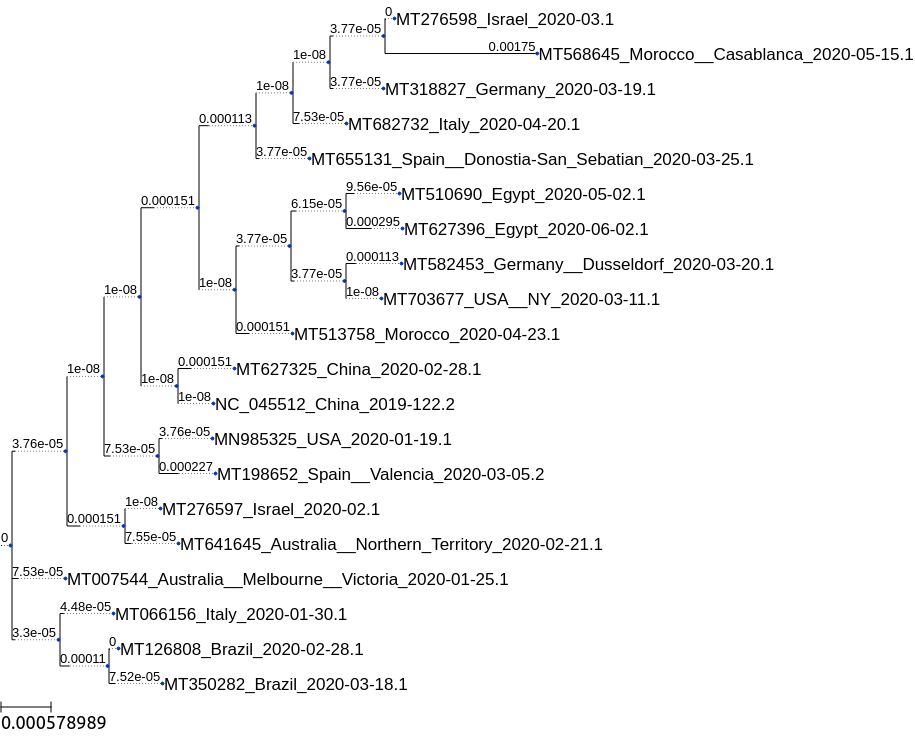

In [32]:
ts = ete3.TreeStyle()
ts.show_branch_length = True
t.render('%%inline', tree_style=ts)

In [36]:
tree = dendropy.Tree.get(data=treestring, schema='newick')

In [44]:
pdc = tree.phylogenetic_distance_matrix()
pdc.as_data_table()

In [51]:
m = []
for i, t1 in enumerate(tree.taxon_namespace):
    n = []
    for j, t2 in enumerate(tree.taxon_namespace):
        n.append(pdc(t1, t2))
        print("Distance between '%s' and '%s': %s" % (t1.label, t2.label, pdc(t1, t2)))
    m.append(n)


Distance between 'MT276598 Israel 2020-03.1' and 'MT276598 Israel 2020-03.1': 0.0
Distance between 'MT276598 Israel 2020-03.1' and 'MT568645 Morocco  Casablanca 2020-05-15.1': 0.00174544
Distance between 'MT276598 Israel 2020-03.1' and 'MT318827 Germany 2020-03-19.1': 7.531000000000001e-05
Distance between 'MT276598 Israel 2020-03.1' and 'MT682732 Italy 2020-04-20.1': 0.00011301
Distance between 'MT276598 Israel 2020-03.1' and 'MT655131 Spain  Donostia-San Sebatian 2020-03-25.1': 7.536000000000001e-05
Distance between 'MT276598 Israel 2020-03.1' and 'MT510690 Egypt 2020-05-02.1': 0.00034544
Distance between 'MT276598 Israel 2020-03.1' and 'MT627396 Egypt 2020-06-02.1': 0.0005452300000000001
Distance between 'MT276598 Israel 2020-03.1' and 'MT582453 Germany  Dusseldorf 2020-03-20.1': 0.00033939
Distance between 'MT276598 Israel 2020-03.1' and 'MT703677 USA  NY 2020-03-11.1': 0.00022604
Distance between 'MT276598 Israel 2020-03.1' and 'MT513758 Morocco 2020-04-23.1': 0.0003013
Distance b

In [101]:
distm = np.array(m)
for i in range(len(labels)):
    print(distm[0, i], labels[i], '\n')

0.0 NC_045512_China_2019-12 

0.00174544 MN985325_USA_2020-01-19 

7.531000000000001e-05 MT007544_Australia__Melbourne__Victoria_2020-01-25 

0.00011301 MT126808_Brazil_2020-02-28 

7.536000000000001e-05 MT066156_Italy_2020-01-30 

0.00034544 MT198652_Spain__Valencia_2020-03-05 

0.0005452300000000001 MT276597_Israel_2020-02 

0.00033939 MT276598_Israel_2020-03 

0.00022604 MT350282_Brazil_2020-03-18 

0.0003013 MT318827_Germany_2020-03-19 

0.00045207 MT513758_Morocco_2020-04-23 

0.0003013 MT568645_Morocco__Casablanca_2020-05-15 

0.00041423999999999996 MT582453_Germany__Dusseldorf_2020-03-20 

0.00060354 MT510690_Egypt_2020-05-02 

0.00045213999999999996 MT627325_China_2020-02-28 

0.00052764 MT641645_Australia__Northern_Territory_2020-02-21 

0.0004142 MT655131_Spain__Donostia-San_Sebatian_2020-03-25 

0.00041669 MT627396_Egypt_2020-06-02 

0.00048228999999999996 MT682732_Italy_2020-04-20 

0.00055751 MT703677_USA__NY_2020-03-11 



In [102]:
plt.bar(distm[0], ticklabel=labels)

TypeError: bar() missing 1 required positional argument: 'height'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

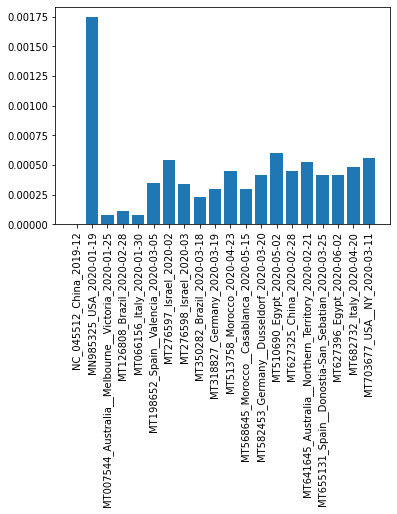

In [104]:
plt.bar(labels, distm[0])
plt.xticks(rotation=90)

Text(0.5, 0.98, 'PhyML Tree')

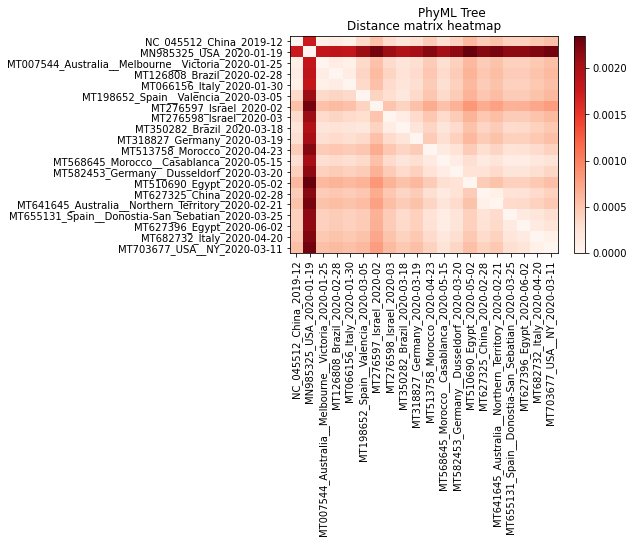

In [62]:
dm = DistanceMatrix(distm, labels)
fig = dm.plot(cmap='Reds', title='Distance matrix heatmap')
fig.suptitle('PhyML Tree')

In [6]:
avivstree = '(MT510690_Egypt_2020-05-02:0.027735,((MT582453_Germany__Dusseldorf_2020-03-20:0.179307,(MT627396_Egypt_2020-06-02:0.712651,MT066156_Italy_2020-01-30:0.507356):0.780639):0.177318,(MT513758_Morocco_2020-04-23:0.337969,(MT276598_Israel_2020-03:0.080855,((MT641645_Australia__Northern_Territory_2020-02-21:0.202646,(MT682732_Italy_2020-04-20:0.062295,(MT350282_Brazil_2020-03-18:0.100176,(MT126808_Brazil_2020-02-28:0.145354,(MT276597_Israel_2020-02:0.163195,(MT568645_Morocco__Casablanca_2020-05-15:0.143476,((MT198652_Spain__Valencia_2020-03-05:0.570879,(MT007544_Australia__Melbourne__Victoria_2020-01-25:0.531991,NC_045512_China_2019-12:0.021705):0.1764):0.64874,(MT627325_China_2020-02-28:0.004934,MN985325_USA_2020-01-19:0.026224):0.04999):0.060672):0.384056):0.174176):0.260027):0.113052):0.087441):0.234291,(MT655131_Spain__Donostia-San_Sebatian_2020-03-25:0.113791,MT318827_Germany_2020-03-19:0.75488):0.01058):0.3715):0.064626):0.105665):0.048913,MT703677_USA__NY_2020-03-11:0.031459);\n'

In [7]:
tree1 = ete3.Tree(treestring)

In [8]:
tree2 = ete3.Tree(avivstree)

In [96]:
tree1.set_outgroup('NC_045512_China_2019-122.2')
tree2.set_outgroup('NC_045512_China_2019-12')

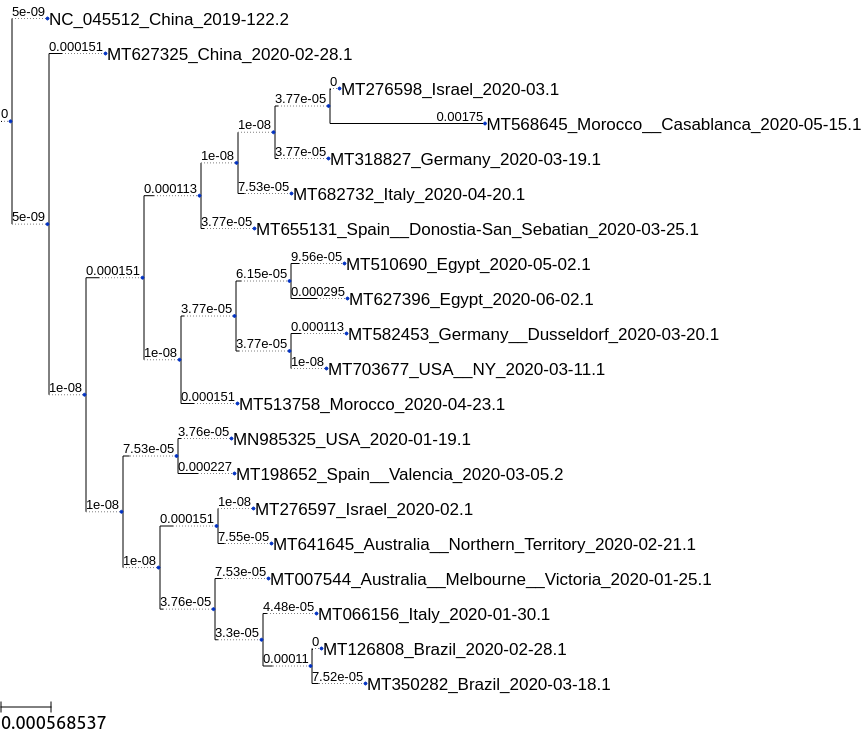

In [97]:
ts = ete3.TreeStyle()
ts.show_branch_length = True
tree1.render('%%inline', tree_style=ts)

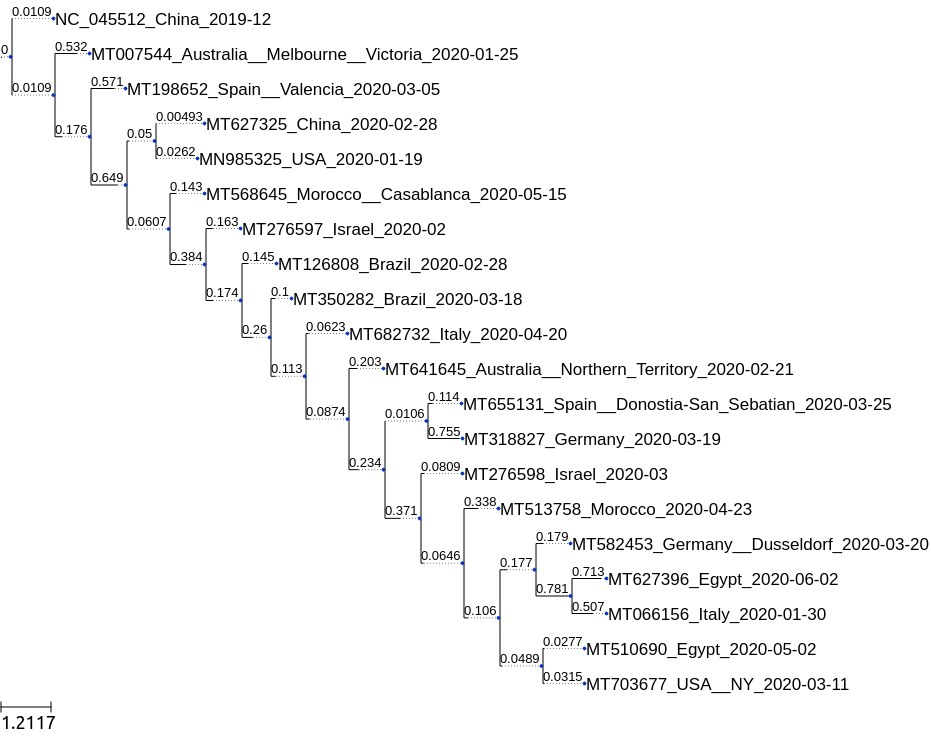

In [98]:
ts = ete3.TreeStyle()
ts.show_branch_length = True
tree2.render('%%inline', tree_style=ts)

In [73]:
res = tree1.robinson_foulds(tree2)

In [74]:
res

[0, -2, set(), set(), set(), set(), set()]

In [18]:
avivstree2 = '(MT510690.1:0.027735,((MT582453.1:0.179307,(MT627396.1:0.712651,MT066156.1:0.507356):0.780639):0.177318,(MT513758.1:0.337969,(MT276598.1:0.080855,((MT641645.1:0.202646,(MT682732.1:0.062295,(MT350282.1:0.100176,(MT126808.1:0.145354,(MT276597.1:0.163195,(MT568645.1:0.143476,((MT198652.2:0.570879,(MT007544.1:0.531991,NC_045512.2:0.021705):0.1764):0.64874,(MT627325.1:0.004934,MN985325.1:0.026224):0.04999):0.060672):0.384056):0.174176):0.260027):0.113052):0.087441):0.234291,(MT655131.1:0.113791,MT318827.1:0.75488):0.01058):0.3715):0.064626):0.105665):0.048913,MT703677.1:0.031459);\n'

In [87]:
tree3 = ete3.Tree(avivstree2)

In [88]:
#t.set_outgroup('NC_045512.2')

In [89]:
#tree3.set_outgroup('NC_045512.2')

In [93]:
res = t.robinson_foulds(tree3, unrooted_trees=True)
res

[34,
 34,
 {'MN985325.1',
  'MT007544.1',
  'MT066156.1',
  'MT126808.1',
  'MT198652.2',
  'MT276597.1',
  'MT276598.1',
  'MT318827.1',
  'MT350282.1',
  'MT510690.1',
  'MT513758.1',
  'MT568645.1',
  'MT582453.1',
  'MT627325.1',
  'MT627396.1',
  'MT641645.1',
  'MT655131.1',
  'MT682732.1',
  'MT703677.1',
  'NC_045512.2'},
 {((),
   ('MN985325.1',
    'MT007544.1',
    'MT066156.1',
    'MT126808.1',
    'MT198652.2',
    'MT276597.1',
    'MT276598.1',
    'MT318827.1',
    'MT350282.1',
    'MT510690.1',
    'MT513758.1',
    'MT568645.1',
    'MT582453.1',
    'MT627325.1',
    'MT627396.1',
    'MT641645.1',
    'MT655131.1',
    'MT682732.1',
    'MT703677.1',
    'NC_045512.2')),
  (('MN985325.1',),
   ('MT007544.1',
    'MT066156.1',
    'MT126808.1',
    'MT198652.2',
    'MT276597.1',
    'MT276598.1',
    'MT318827.1',
    'MT350282.1',
    'MT510690.1',
    'MT513758.1',
    'MT568645.1',
    'MT582453.1',
    'MT627325.1',
    'MT627396.1',
    'MT641645.1',
    'MT6

In [22]:
tree2 = dendropy.Tree.get(data=treestring, schema='newick')
dendropy.calculate.treemeasure.colless_tree_imbalance(tree)

TypeError: Colless' tree imbalance statistic requires strictly bifurcating trees

In [23]:
tree1 = dendropy.Tree.get(data=avivstree2, schema='newick')
dendropy.calculate.treemeasure.colless_tree_imbalance(tree)

TypeError: Colless' tree imbalance statistic requires strictly bifurcating trees

In [24]:

tree1.encode_bipartitions()
tree2.encode_bipartitions()
print(dendropy.calculate.treecompare.euclidean_distance(tree1, tree2))

TaxonNamespaceIdentityError: Non-identical taxon namespace references: <TaxonNamespace object at 0x7fc49fc7dad0> is not <TaxonNamespace object at 0x7fc49fc7dc10>